In [1]:
import os
import wave
import struct
import pandas as pd
import scipy
from scipy import signal
from scipy.fft import fftshift

import numpy as np
np.random.seed(seed=42)
import seaborn as sns

import matplotlib.pyplot as plt 
import matplotlib.pylab as plab

import IPython.display as ipd
import librosa
import librosa.display

# Funções auxiliares

In [2]:
def plot_wave(caminho, titulo):    
    data, sample_rate = librosa.load(caminho)
    print("Frequência do áudio: ", sample_rate)
    librosa.display.waveplot(data,sr=sample_rate)
    plt.title(titulo)
    plt.xlabel("Tempo")
    plt.ylabel("Amplitude")   
    
def plot_fft_wave(caminho, titulo, x_limits):
    data, sample_rate = librosa.load(caminho)
    n = len(data)
    T = 1/sample_rate
    yf = scipy.fft.fft(data) #Aplica a FFT no audio
    xf = np.linspace(0.0, 1.0/(2.0*T), n//2) #Cria um array contendo os pontos de x correspondentes ao yf
    
    fig, ax = plt.subplots()
    
    ax.plot(xf, 2.0/n * np.abs(yf[:n//2]))
    ax.set_xlim(x_limits)
    plt.grid()
    plt.xlabel("Frequência")
    plt.ylabel("Magnitude")
    plt.title(titulo)
    
def plot_wave_with_fft(caminho):
    data, sample_rate = librosa.load(caminho)
    n = len(data)
    T = 1/sample_rate
    yf = scipy.fft.fft(data) #Aplica a FFT no audio
    xf = np.linspace(0.0, 1.0/(2.0*T), n//2) #Cria um array contendo os pontos de x correspondentes ao yf
    
    plt.figure(figsize=(15,5))
    
    plt.subplot(1, 2, 1)
    librosa.display.waveplot(data,sr=sample_rate)
    plt.xlabel("Tempo")
    plt.ylabel("Amplitude")
    plt.title("Onda")
    
    plt.subplot(1, 2, 2)
    plt.plot(xf, 2.0/n * np.abs(yf[:n//2]))
    plt.grid()
    plt.xlabel("Frequência")
    plt.ylabel("Magnitude")
    plt.title("FFT")
    
def plot_multiple_FFT(lista_caminhos, xlim=[0,2000]):
    plt.figure(figsize=(15, 10))
    plt.grid()
    plt.xlabel("Frequência")
    plt.xlim(xlim)
    plt.ylabel("Magnitude")    
    
    for caminho in lista_caminhos:
        data, sample_rate = librosa.load(caminho)
        n = len(data)
        T = 1/sample_rate
        yf = scipy.fft.fft(data) #Aplica a FFT no audio
        xf = np.linspace(0.0, 1.0/(2.0*T), n//2) #Cria um array contendo os pontos de x correspondentes ao yf

        plt.plot(xf, 2.0/n * np.abs(yf[:n//2]))
    
    plt.legend(lista_caminhos)
        
def spectrograma(caminho):
    x, fs = librosa.load(caminho)
    f, t, Sxx = signal.spectrogram(x, fs)
    plt.pcolormesh(t, f, Sxx, shading='gouraud')
    plt.ylabel('Frequência [Hz]')
    plt.xlabel('Tempo [sec]')

# Analise do cenário em som ambiente

In [3]:
base_path = '../Obtenção de dados/Saídas/1 - Som ambiente/'
base_path

'../Obtenção de dados/Saídas/1 - Som ambiente/'

# Carregar os dados

In [4]:
tests_path = ['0 - Regime Normal/', 
              '1 - Falta de tensão/', 
              '2 - Sobrecarga/', 
              '3 - Desbalanceamento do eixo/']

tests_path

['0 - Regime Normal/',
 '1 - Falta de tensão/',
 '2 - Sobrecarga/',
 '3 - Desbalanceamento do eixo/']

In [5]:
os.listdir(base_path)

['2 - Sobrecarga',
 '1 - Falta de tensão',
 '3 - Desbalanceamento do eixo',
 '0 - Regime Normal']

### Encontrar o caminho completo de todos os arquivos

In [6]:
all_files = []

for f in tests_path:    
    all_files = all_files + [(base_path + f + i, f) for i in os.listdir(base_path + f)]

all_files

[('../Obtenção de dados/Saídas/1 - Som ambiente/0 - Regime Normal/2021-05-26 20:53:43.925687.wav',
  '0 - Regime Normal/'),
 ('../Obtenção de dados/Saídas/1 - Som ambiente/0 - Regime Normal/2021-05-26 20:52:48.734353.wav',
  '0 - Regime Normal/'),
 ('../Obtenção de dados/Saídas/1 - Som ambiente/0 - Regime Normal/2021-05-26 20:54:37.037314.wav',
  '0 - Regime Normal/'),
 ('../Obtenção de dados/Saídas/1 - Som ambiente/0 - Regime Normal/2021-05-26 20:54:48.132438.wav',
  '0 - Regime Normal/'),
 ('../Obtenção de dados/Saídas/1 - Som ambiente/0 - Regime Normal/2021-05-26 20:53:12.448972.wav',
  '0 - Regime Normal/'),
 ('../Obtenção de dados/Saídas/1 - Som ambiente/0 - Regime Normal/2021-05-26 20:53:01.114803.wav',
  '0 - Regime Normal/'),
 ('../Obtenção de dados/Saídas/1 - Som ambiente/0 - Regime Normal/2021-05-26 20:53:24.358845.wav',
  '0 - Regime Normal/'),
 ('../Obtenção de dados/Saídas/1 - Som ambiente/0 - Regime Normal/2021-05-26 20:54:25.130846.wav',
  '0 - Regime Normal/'),
 ('../Ob

## Carregar os arquivos e adiciona-los em um conjunto manipulável

#### Exemplo para um arquivo

In [7]:
import wave
import struct

CHUNK = 1024 * 2

some_file = '../Obtenção de dados/Saídas/1 - Som ambiente/0 - Regime Normal/2021-05-26 20:53:43.925687.wav'
wave_file = wave.open(some_file, 'rb')
data = wave_file.readframes(CHUNK)
dataInt = struct.unpack(str(CHUNK) + 'h', data)

#### Carregar todos

In [8]:
df_audio = pd.DataFrame()

for f, c in all_files:
    df_aux = pd.DataFrame()
    
    wave_file = wave.open(f, 'rb')
    data = wave_file.readframes(CHUNK)
    dataInt = struct.unpack(str(CHUNK) + 'h', data)
    
    df_aux = df_aux.append(pd.Series(dataInt), ignore_index=True)
    df_aux['class'] = c
    df_audio = pd.concat([df_audio, df_aux])
    
    
    
df_audio = df_audio.reset_index(drop=True)
df_audio

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,class
0,3013.0,3016.0,3099.0,3115.0,3074.0,3058.0,3047.0,2989.0,2858.0,2727.0,...,998.0,946.0,885.0,837.0,728.0,586.0,487.0,406.0,278.0,0 - Regime Normal/
1,-551.0,-399.0,-394.0,-418.0,-445.0,-379.0,-283.0,-310.0,-253.0,-125.0,...,2240.0,2329.0,2438.0,2558.0,2550.0,2380.0,2297.0,2343.0,2320.0,0 - Regime Normal/
2,-1305.0,-1221.0,-1244.0,-1234.0,-1137.0,-1079.0,-1059.0,-982.0,-876.0,-825.0,...,1160.0,1007.0,991.0,1121.0,1205.0,1166.0,1145.0,1054.0,960.0,0 - Regime Normal/
3,2893.0,2965.0,3006.0,3076.0,3173.0,3177.0,3174.0,3161.0,3144.0,3099.0,...,3965.0,3978.0,4080.0,4123.0,4145.0,4037.0,3912.0,3832.0,3870.0,0 - Regime Normal/
4,2305.0,2196.0,2092.0,2028.0,1909.0,1807.0,1776.0,1839.0,1902.0,1943.0,...,-1234.0,-1330.0,-1386.0,-1403.0,-1380.0,-1344.0,-1329.0,-1344.0,-1366.0,0 - Regime Normal/
5,1775.0,1653.0,1672.0,1650.0,1670.0,1720.0,1767.0,1847.0,1947.0,2004.0,...,3742.0,3800.0,3850.0,4008.0,4176.0,4197.0,4116.0,4012.0,3931.0,0 - Regime Normal/
6,3366.0,3348.0,3421.0,3545.0,3519.0,3440.0,3375.0,3322.0,3184.0,3179.0,...,2428.0,2450.0,2500.0,2556.0,2641.0,2704.0,2777.0,2768.0,2673.0,0 - Regime Normal/
7,1530.0,1436.0,1428.0,1382.0,1440.0,1404.0,1328.0,1306.0,1277.0,1166.0,...,-1800.0,-1721.0,-1614.0,-1598.0,-1568.0,-1629.0,-1625.0,-1422.0,-1412.0,0 - Regime Normal/
8,-1040.0,-939.0,-852.0,-810.0,-815.0,-925.0,-912.0,-820.0,-719.0,-682.0,...,2018.0,2106.0,2234.0,2238.0,2107.0,2069.0,1971.0,1898.0,1981.0,0 - Regime Normal/
9,1262.0,1180.0,1160.0,1200.0,1273.0,1372.0,1399.0,1465.0,1578.0,1595.0,...,-5.0,68.0,124.0,152.0,146.0,90.0,2.0,-131.0,-182.0,0 - Regime Normal/


## Salvar os dados em um conjunto intermediário

In [9]:
df_audio.to_csv('Saídas/dados_carregados.csv')

### Verificar a quantidade de amostras por classe

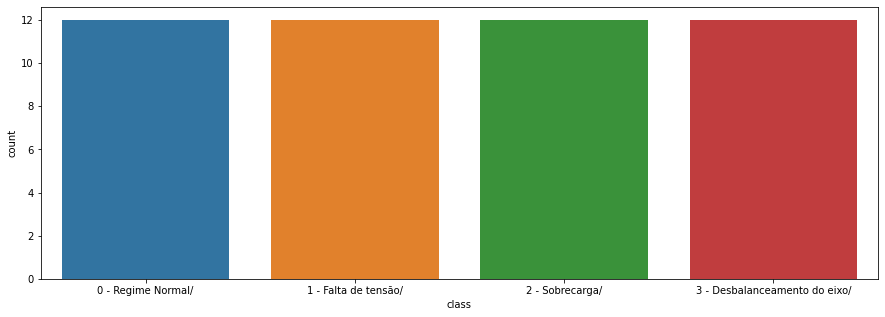

In [10]:
plt.figure(figsize=(15,5))
sns.countplot(data=df_audio, x = 'class');

# Análise das formas de onda no dominio da transformada

In [11]:
regime_normal = all_files[0][0]
falta_tensao = all_files[14][0]
sobrecarga = all_files[24][0]
desbalanceado = all_files[36][0]

### Regime normal

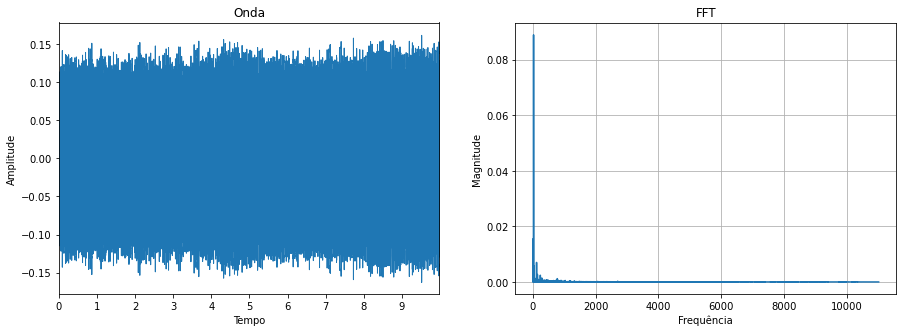

In [12]:
plot_wave_with_fft(regime_normal)

### Falta de tensão

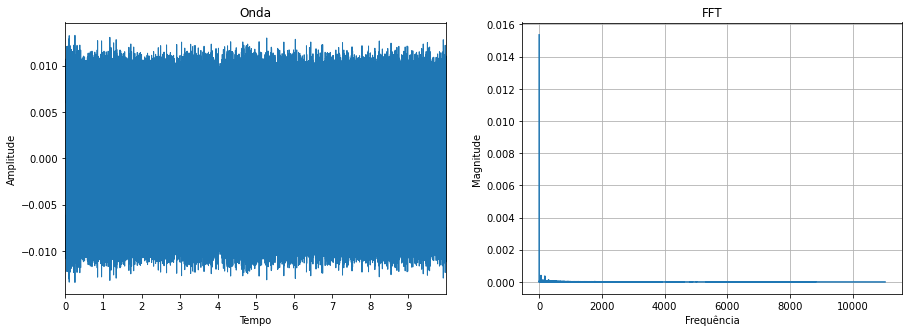

In [13]:
plot_wave_with_fft(falta_tensao)

### Sobrecarga

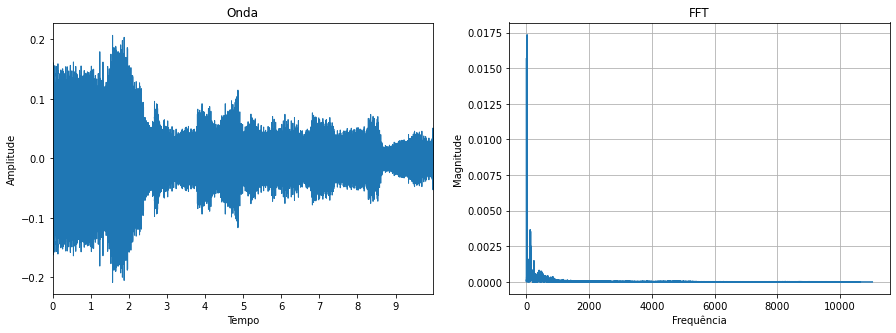

In [14]:
plot_wave_with_fft(sobrecarga)

### Desbalanceamento

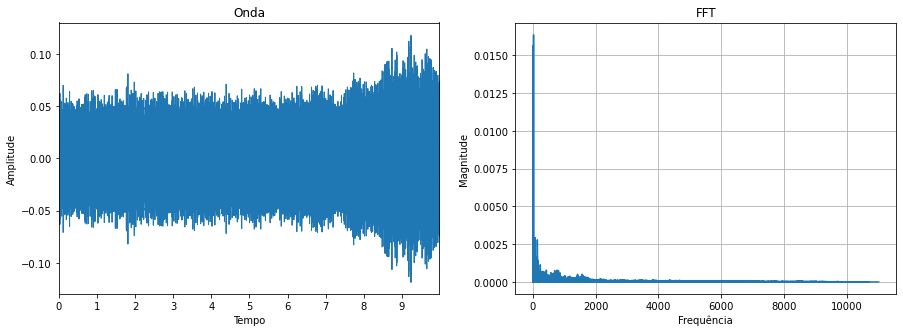

In [15]:
plot_wave_with_fft(desbalanceado)

### Notas observadas

* Pouca variação no espectro
* Muita variação na amplitude

### Considerações no processamento
* Experimentar um modo hibrido de treinamento caso não se tenha um bom desempenho apenas com a FFT\

# Resumo das faixas de frequência

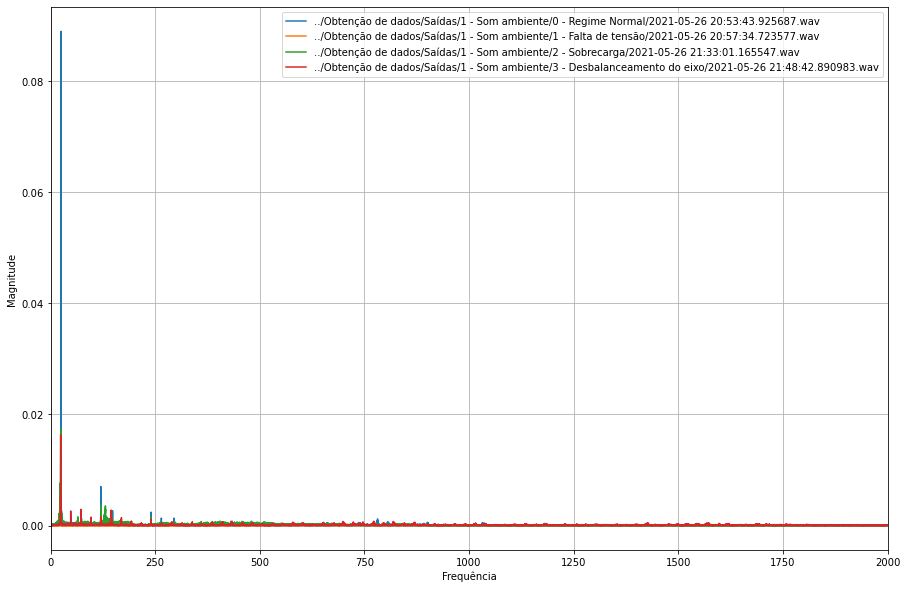

In [16]:
lista_fft = [
    regime_normal,
    falta_tensao,
    sobrecarga,
    desbalanceado
]

plot_multiple_FFT(lista_fft)

### Notas:
* Amplo espectro com baixa variação 

# Análise com Espectograma 

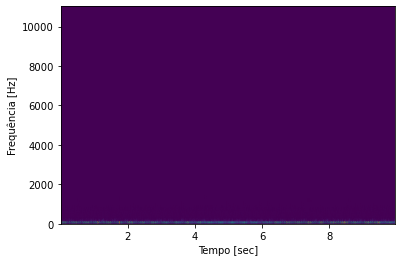

In [17]:
spectrograma(regime_normal)

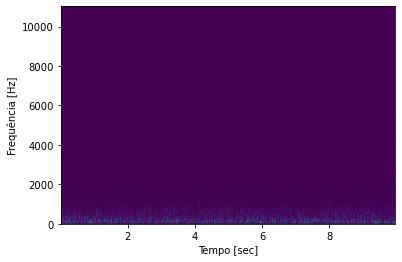

In [18]:
spectrograma(falta_tensao)

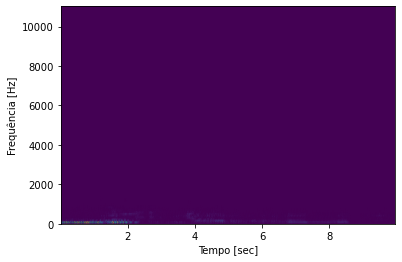

In [19]:
spectrograma(sobrecarga)

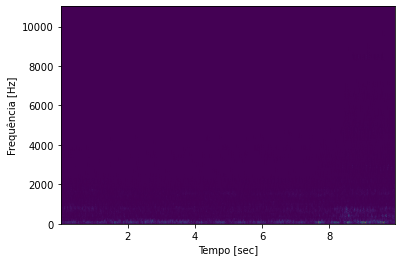

In [20]:
spectrograma(desbalanceado)

### Notas
* A variação da frequência no tempo fica um pouco mais evidente com o uso do espectrograma

# 1º Teste: Conjunto de dados cru sem aplicação da FFT

In [21]:
import pandas as pd

df_audio = pd.read_csv('Saídas/dados_carregados.csv', index_col=0)
df_audio.head()

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,class
0,3013.0,3016.0,3099.0,3115.0,3074.0,3058.0,3047.0,2989.0,2858.0,2727.0,...,998.0,946.0,885.0,837.0,728.0,586.0,487.0,406.0,278.0,0 - Regime Normal/
1,-551.0,-399.0,-394.0,-418.0,-445.0,-379.0,-283.0,-310.0,-253.0,-125.0,...,2240.0,2329.0,2438.0,2558.0,2550.0,2380.0,2297.0,2343.0,2320.0,0 - Regime Normal/
2,-1305.0,-1221.0,-1244.0,-1234.0,-1137.0,-1079.0,-1059.0,-982.0,-876.0,-825.0,...,1160.0,1007.0,991.0,1121.0,1205.0,1166.0,1145.0,1054.0,960.0,0 - Regime Normal/
3,2893.0,2965.0,3006.0,3076.0,3173.0,3177.0,3174.0,3161.0,3144.0,3099.0,...,3965.0,3978.0,4080.0,4123.0,4145.0,4037.0,3912.0,3832.0,3870.0,0 - Regime Normal/
4,2305.0,2196.0,2092.0,2028.0,1909.0,1807.0,1776.0,1839.0,1902.0,1943.0,...,-1234.0,-1330.0,-1386.0,-1403.0,-1380.0,-1344.0,-1329.0,-1344.0,-1366.0,0 - Regime Normal/


### Separação de entradas e saídas

In [22]:
X = df_audio.drop(['class'], axis=1)
y = df_audio['class']

### Encode das saidas

In [23]:
from sklearn.preprocessing import LabelEncoder

lbl_enc = LabelEncoder()

y = lbl_enc.fit_transform(y)

## Separação treino e teste 

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Experimentação com algoritmos tradicionais 

In [25]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True, gamma="auto"),
    NuSVC(probability=True, gamma="auto"),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
        
]

for classifier in classifiers:
    classifier.fit(X_train, y_train)   
    print(classifier)
    print("model score: %.3f" % classifier.score(X_test, y_test))
    print("\n")

KNeighborsClassifier(n_neighbors=3)
model score: 0.400


SVC(C=0.025, gamma='auto', probability=True)
model score: 0.100


NuSVC(gamma='auto', probability=True)
model score: 0.100


DecisionTreeClassifier()
model score: 0.600


RandomForestClassifier()
model score: 0.400


AdaBoostClassifier()
model score: 0.600


GradientBoostingClassifier()
model score: 0.500




## Experimentação com Algoritimo de aprendizagem profunda

In [26]:
from keras.models import Sequential
from keras.layers import Dense

In [27]:
model = Sequential()
model.add(Dense(12, input_dim=2048, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [28]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
X_train_deep = np.asarray(X_train)
y_train_deep = np.asarray(y_train)
X_test_deep = np.asarray(X_test)
y_test_deep = np.asarray(y_test)

In [30]:
model.fit(X_train_deep, y_train_deep, epochs=1000, batch_size=100)

Epoch 1/1000
1/1 [==============================] - 0s 1ms/step - loss: 27.4933 - accuracy: 0.4211
Epoch 2/1000
1/1 [==============================] - 0s 2ms/step - loss: -76.8779 - accuracy: 0.2632
Epoch 3/1000
1/1 [==============================] - 0s 3ms/step - loss: -274.5010 - accuracy: 0.2632
Epoch 4/1000
1/1 [==============================] - 0s 1ms/step - loss: -521.5233 - accuracy: 0.3947
Epoch 5/1000
1/1 [==============================] - 0s 3ms/step - loss: -854.6649 - accuracy: 0.3421
Epoch 6/1000
1/1 [==============================] - 0s 4ms/step - loss: -1299.5940 - accuracy: 0.3158
Epoch 7/1000
1/1 [==============================] - 0s 3ms/step - loss: -1858.7993 - accuracy: 0.2632
Epoch 8/1000
1/1 [==============================] - 0s 5ms/step - loss: -2558.5505 - accuracy: 0.3684
Epoch 9/1000
1/1 [==============================] - 0s 5ms/step - loss: -3407.5999 - accuracy: 0.3684
Epoch 10/1000
1/1 [==============================] - 0s 2ms/step - loss: -4415.7085 - accu

1/1 [==============================] - 0s 3ms/step - loss: -2599158.0000 - accuracy: 0.3421
Epoch 80/1000
1/1 [==============================] - 0s 2ms/step - loss: -2726497.7500 - accuracy: 0.3684
Epoch 81/1000
1/1 [==============================] - 0s 2ms/step - loss: -2858833.0000 - accuracy: 0.4211
Epoch 82/1000
1/1 [==============================] - 0s 2ms/step - loss: -2995583.5000 - accuracy: 0.4211
Epoch 83/1000
1/1 [==============================] - 0s 2ms/step - loss: -3137336.7500 - accuracy: 0.3947
Epoch 84/1000
1/1 [==============================] - 0s 2ms/step - loss: -3284080.7500 - accuracy: 0.3684
Epoch 85/1000
1/1 [==============================] - 0s 2ms/step - loss: -3436032.7500 - accuracy: 0.3684
Epoch 86/1000
1/1 [==============================] - 0s 2ms/step - loss: -3592614.7500 - accuracy: 0.4211
Epoch 87/1000
1/1 [==============================] - 0s 3ms/step - loss: -3755062.7500 - accuracy: 0.4211
Epoch 88/1000
1/1 [==============================] - 0s 2ms/

1/1 [==============================] - 0s 1ms/step - loss: -33099386.0000 - accuracy: 0.3421
Epoch 156/1000
1/1 [==============================] - 0s 2ms/step - loss: -33896372.0000 - accuracy: 0.4211
Epoch 157/1000
1/1 [==============================] - 0s 2ms/step - loss: -34704732.0000 - accuracy: 0.3947
Epoch 158/1000
1/1 [==============================] - 0s 2ms/step - loss: -35528096.0000 - accuracy: 0.3947
Epoch 159/1000
1/1 [==============================] - 0s 6ms/step - loss: -36363764.0000 - accuracy: 0.3684
Epoch 160/1000
1/1 [==============================] - 0s 2ms/step - loss: -37213856.0000 - accuracy: 0.3684
Epoch 161/1000
1/1 [==============================] - 0s 5ms/step - loss: -38077708.0000 - accuracy: 0.4211
Epoch 162/1000
1/1 [==============================] - 0s 2ms/step - loss: -38954400.0000 - accuracy: 0.3947
Epoch 163/1000
1/1 [==============================] - 0s 8ms/step - loss: -39846200.0000 - accuracy: 0.3947
Epoch 164/1000
1/1 [=======================

1/1 [==============================] - 0s 2ms/step - loss: -137087888.0000 - accuracy: 0.3947
Epoch 231/1000
1/1 [==============================] - 0s 2ms/step - loss: -139192704.0000 - accuracy: 0.4211
Epoch 232/1000
1/1 [==============================] - 0s 2ms/step - loss: -141314400.0000 - accuracy: 0.3947
Epoch 233/1000
1/1 [==============================] - 0s 2ms/step - loss: -143455136.0000 - accuracy: 0.3684
Epoch 234/1000
1/1 [==============================] - 0s 2ms/step - loss: -145623488.0000 - accuracy: 0.4211
Epoch 235/1000
1/1 [==============================] - 0s 2ms/step - loss: -147812512.0000 - accuracy: 0.4211
Epoch 236/1000
1/1 [==============================] - 0s 2ms/step - loss: -150020336.0000 - accuracy: 0.3684
Epoch 237/1000
1/1 [==============================] - 0s 3ms/step - loss: -152253584.0000 - accuracy: 0.3421
Epoch 238/1000
1/1 [==============================] - 0s 2ms/step - loss: -154508192.0000 - accuracy: 0.4211
Epoch 239/1000
1/1 [==============

1/1 [==============================] - 0s 2ms/step - loss: -361079712.0000 - accuracy: 0.4211
Epoch 306/1000
1/1 [==============================] - 0s 2ms/step - loss: -365061760.0000 - accuracy: 0.4474
Epoch 307/1000
1/1 [==============================] - 0s 2ms/step - loss: -369086560.0000 - accuracy: 0.4211
Epoch 308/1000
1/1 [==============================] - 0s 1ms/step - loss: -373125888.0000 - accuracy: 0.3421
Epoch 309/1000
1/1 [==============================] - 0s 2ms/step - loss: -377201920.0000 - accuracy: 0.3421
Epoch 310/1000
1/1 [==============================] - 0s 2ms/step - loss: -381319136.0000 - accuracy: 0.3684
Epoch 311/1000
1/1 [==============================] - 0s 2ms/step - loss: -385451776.0000 - accuracy: 0.4211
Epoch 312/1000
1/1 [==============================] - 0s 1ms/step - loss: -389606752.0000 - accuracy: 0.4211
Epoch 313/1000
1/1 [==============================] - 0s 1ms/step - loss: -393804608.0000 - accuracy: 0.3947
Epoch 314/1000
1/1 [==============

1/1 [==============================] - 0s 3ms/step - loss: -746672384.0000 - accuracy: 0.4211
Epoch 381/1000
1/1 [==============================] - 0s 3ms/step - loss: -753086848.0000 - accuracy: 0.4211
Epoch 382/1000
1/1 [==============================] - 0s 3ms/step - loss: -759530880.0000 - accuracy: 0.3684
Epoch 383/1000
1/1 [==============================] - 0s 2ms/step - loss: -766023232.0000 - accuracy: 0.3421
Epoch 384/1000
1/1 [==============================] - 0s 9ms/step - loss: -772518400.0000 - accuracy: 0.4211
Epoch 385/1000
1/1 [==============================] - 0s 2ms/step - loss: -779073344.0000 - accuracy: 0.4211
Epoch 386/1000
1/1 [==============================] - 0s 3ms/step - loss: -785676672.0000 - accuracy: 0.3421
Epoch 387/1000
1/1 [==============================] - 0s 2ms/step - loss: -792302272.0000 - accuracy: 0.3421
Epoch 388/1000
1/1 [==============================] - 0s 2ms/step - loss: -798958336.0000 - accuracy: 0.4211
Epoch 389/1000
1/1 [==============

1/1 [==============================] - 0s 1ms/step - loss: -1322548096.0000 - accuracy: 0.4474
Epoch 455/1000
1/1 [==============================] - 0s 2ms/step - loss: -1331787392.0000 - accuracy: 0.3947
Epoch 456/1000
1/1 [==============================] - 0s 1ms/step - loss: -1341093376.0000 - accuracy: 0.3421
Epoch 457/1000
1/1 [==============================] - 0s 1ms/step - loss: -1350444032.0000 - accuracy: 0.3421
Epoch 458/1000
1/1 [==============================] - 0s 2ms/step - loss: -1359847808.0000 - accuracy: 0.3947
Epoch 459/1000
1/1 [==============================] - 0s 2ms/step - loss: -1369314432.0000 - accuracy: 0.3947
Epoch 460/1000
1/1 [==============================] - 0s 1ms/step - loss: -1378788096.0000 - accuracy: 0.4211
Epoch 461/1000
1/1 [==============================] - 0s 2ms/step - loss: -1388312320.0000 - accuracy: 0.3947
Epoch 462/1000
1/1 [==============================] - 0s 2ms/step - loss: -1397872256.0000 - accuracy: 0.3684
Epoch 463/1000
1/1 [=====

1/1 [==============================] - 0s 7ms/step - loss: -2126029696.0000 - accuracy: 0.4211
Epoch 529/1000
1/1 [==============================] - 0s 2ms/step - loss: -2138534528.0000 - accuracy: 0.4474
Epoch 530/1000
1/1 [==============================] - 0s 2ms/step - loss: -2151170304.0000 - accuracy: 0.4211
Epoch 531/1000
1/1 [==============================] - 0s 2ms/step - loss: -2163862272.0000 - accuracy: 0.4211
Epoch 532/1000
1/1 [==============================] - 0s 2ms/step - loss: -2176593664.0000 - accuracy: 0.3421
Epoch 533/1000
1/1 [==============================] - 0s 11ms/step - loss: -2189327616.0000 - accuracy: 0.3421
Epoch 534/1000
1/1 [==============================] - 0s 2ms/step - loss: -2202142720.0000 - accuracy: 0.3684
Epoch 535/1000
1/1 [==============================] - 0s 2ms/step - loss: -2214985728.0000 - accuracy: 0.4211
Epoch 536/1000
1/1 [==============================] - 0s 2ms/step - loss: -2227856384.0000 - accuracy: 0.4211
Epoch 537/1000
1/1 [====

1/1 [==============================] - 0s 3ms/step - loss: -3187834112.0000 - accuracy: 0.4474
Epoch 603/1000
1/1 [==============================] - 0s 2ms/step - loss: -3204120832.0000 - accuracy: 0.4474
Epoch 604/1000
1/1 [==============================] - 0s 1ms/step - loss: -3220423680.0000 - accuracy: 0.3684
Epoch 605/1000
1/1 [==============================] - 0s 2ms/step - loss: -3236736512.0000 - accuracy: 0.3158
Epoch 606/1000
1/1 [==============================] - 0s 2ms/step - loss: -3253239296.0000 - accuracy: 0.4211
Epoch 607/1000
1/1 [==============================] - 0s 3ms/step - loss: -3269655552.0000 - accuracy: 0.3947
Epoch 608/1000
1/1 [==============================] - 0s 2ms/step - loss: -3286155264.0000 - accuracy: 0.4211
Epoch 609/1000
1/1 [==============================] - 0s 2ms/step - loss: -3302743552.0000 - accuracy: 0.4211
Epoch 610/1000
1/1 [==============================] - 0s 2ms/step - loss: -3319381504.0000 - accuracy: 0.3684
Epoch 611/1000
1/1 [=====

1/1 [==============================] - 0s 2ms/step - loss: -4536142336.0000 - accuracy: 0.3684
Epoch 677/1000
1/1 [==============================] - 0s 2ms/step - loss: -4556388864.0000 - accuracy: 0.3947
Epoch 678/1000
1/1 [==============================] - 0s 2ms/step - loss: -4576675328.0000 - accuracy: 0.4474
Epoch 679/1000
1/1 [==============================] - 0s 4ms/step - loss: -4597134848.0000 - accuracy: 0.4474
Epoch 680/1000
1/1 [==============================] - 0s 3ms/step - loss: -4617600000.0000 - accuracy: 0.3947
Epoch 681/1000
1/1 [==============================] - 0s 1ms/step - loss: -4638144512.0000 - accuracy: 0.3421
Epoch 682/1000
1/1 [==============================] - 0s 2ms/step - loss: -4658718720.0000 - accuracy: 0.3158
Epoch 683/1000
1/1 [==============================] - 0s 4ms/step - loss: -4679387136.0000 - accuracy: 0.3947
Epoch 684/1000
1/1 [==============================] - 0s 2ms/step - loss: -4700092416.0000 - accuracy: 0.4474
Epoch 685/1000
1/1 [=====

1/1 [==============================] - 0s 2ms/step - loss: -6196263424.0000 - accuracy: 0.3684
Epoch 751/1000
1/1 [==============================] - 0s 3ms/step - loss: -6220855808.0000 - accuracy: 0.3947
Epoch 752/1000
1/1 [==============================] - 0s 1ms/step - loss: -6245590016.0000 - accuracy: 0.3947
Epoch 753/1000
1/1 [==============================] - 0s 2ms/step - loss: -6270473728.0000 - accuracy: 0.4474
Epoch 754/1000
1/1 [==============================] - 0s 2ms/step - loss: -6295392256.0000 - accuracy: 0.3947
Epoch 755/1000
1/1 [==============================] - 0s 2ms/step - loss: -6320198656.0000 - accuracy: 0.3421
Epoch 756/1000
1/1 [==============================] - 0s 2ms/step - loss: -6345164288.0000 - accuracy: 0.4211
Epoch 757/1000
1/1 [==============================] - 0s 2ms/step - loss: -6370290176.0000 - accuracy: 0.3421
Epoch 758/1000
1/1 [==============================] - 0s 2ms/step - loss: -6395424768.0000 - accuracy: 0.3947
Epoch 759/1000
1/1 [=====

1/1 [==============================] - 0s 3ms/step - loss: -8191987712.0000 - accuracy: 0.3947
Epoch 825/1000
1/1 [==============================] - 0s 16ms/step - loss: -8221104128.0000 - accuracy: 0.3947
Epoch 826/1000
1/1 [==============================] - 0s 1ms/step - loss: -8250554880.0000 - accuracy: 0.3947
Epoch 827/1000
1/1 [==============================] - 0s 1ms/step - loss: -8280233984.0000 - accuracy: 0.4211
Epoch 828/1000
1/1 [==============================] - 0s 2ms/step - loss: -8309676032.0000 - accuracy: 0.3947
Epoch 829/1000
1/1 [==============================] - 0s 2ms/step - loss: -8339273216.0000 - accuracy: 0.3684
Epoch 830/1000
1/1 [==============================] - 0s 1ms/step - loss: -8368992256.0000 - accuracy: 0.3421
Epoch 831/1000
1/1 [==============================] - 0s 2ms/step - loss: -8398882304.0000 - accuracy: 0.3947
Epoch 832/1000
1/1 [==============================] - 0s 2ms/step - loss: -8428722176.0000 - accuracy: 0.4211
Epoch 833/1000
1/1 [====

1/1 [==============================] - 0s 2ms/step - loss: -10545075200.0000 - accuracy: 0.3947
Epoch 899/1000
1/1 [==============================] - 0s 2ms/step - loss: -10579317760.0000 - accuracy: 0.3158
Epoch 900/1000
1/1 [==============================] - 0s 4ms/step - loss: -10613782528.0000 - accuracy: 0.3684
Epoch 901/1000
1/1 [==============================] - 0s 3ms/step - loss: -10648302592.0000 - accuracy: 0.4211
Epoch 902/1000
1/1 [==============================] - 0s 1ms/step - loss: -10682738688.0000 - accuracy: 0.3947
Epoch 903/1000
1/1 [==============================] - 0s 2ms/step - loss: -10717391872.0000 - accuracy: 0.3947
Epoch 904/1000
1/1 [==============================] - 0s 1ms/step - loss: -10752216064.0000 - accuracy: 0.4211
Epoch 905/1000
1/1 [==============================] - 0s 3ms/step - loss: -10786910208.0000 - accuracy: 0.3421
Epoch 906/1000
1/1 [==============================] - 0s 3ms/step - loss: -10821744640.0000 - accuracy: 0.3421
Epoch 907/1000
1

1/1 [==============================] - 0s 4ms/step - loss: -13235866624.0000 - accuracy: 0.3947
Epoch 972/1000
1/1 [==============================] - 0s 6ms/step - loss: -13275309056.0000 - accuracy: 0.3947
Epoch 973/1000
1/1 [==============================] - 0s 2ms/step - loss: -13315009536.0000 - accuracy: 0.3684
Epoch 974/1000
1/1 [==============================] - 0s 2ms/step - loss: -13354664960.0000 - accuracy: 0.3421
Epoch 975/1000
1/1 [==============================] - 0s 4ms/step - loss: -13394507776.0000 - accuracy: 0.3947
Epoch 976/1000
1/1 [==============================] - 0s 2ms/step - loss: -13434317824.0000 - accuracy: 0.4211
Epoch 977/1000
1/1 [==============================] - 0s 2ms/step - loss: -13473878016.0000 - accuracy: 0.4211
Epoch 978/1000
1/1 [==============================] - 0s 5ms/step - loss: -13514024960.0000 - accuracy: 0.3947
Epoch 979/1000
1/1 [==============================] - 0s 6ms/step - loss: -13553894400.0000 - accuracy: 0.4211
Epoch 980/1000
1

In [31]:
_, accuracy = model.evaluate(X_test_deep, y_test_deep)
print('Accuracy: %.2f' % (accuracy*100))

1/1 [==============================] - 0s 2ms/step - loss: -10430261248.0000 - accuracy: 0.2000
Accuracy: 20.00


### Notas:
* Performance pifia

# Teste do melhor algoritimo com outras métricas

In [32]:
clf = AdaBoostClassifier()
clf.fit(X_train, y_train)   

AdaBoostClassifier()

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

predicoes = clf.predict(X_test)

In [34]:
accuracy_score(predicoes, y_test)

0.6

In [35]:
confusion_matrix(predicoes, y_test)

array([[0, 0, 0, 0],
       [0, 2, 0, 2],
       [1, 0, 4, 1],
       [0, 0, 0, 0]])

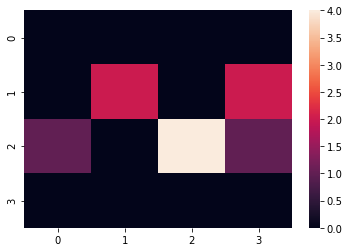

In [36]:
sns.heatmap(confusion_matrix(predicoes, y_test));

In [37]:
print(classification_report(predicoes,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.50      0.67         4
           2       1.00      0.67      0.80         6
           3       0.00      0.00      0.00         0

    accuracy                           0.60        10
   macro avg       0.50      0.29      0.37        10
weighted avg       1.00      0.60      0.75        10



/home/vinicio/anaconda3/envs/deep/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vinicio/anaconda3/envs/deep/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vinicio/anaconda3/envs/deep/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Resultados inaceitáveis

# 2º teste: Submissão dos dados a uma FFT 

In [38]:
CHUNK = 1024 *2

def apply_fft_in_df(dataInt):
    fft_value = np.fft.fft(dataInt)
    absolute_value = np.abs(fft_value)
    audio_freq_convert = absolute_value *2 / (33000*CHUNK) 
    return audio_freq_convert

X_fft = X.apply(apply_fft_in_df, axis=1, result_type='expand')

## Separação treino e teste 

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_fft, y, test_size=0.2, random_state=42)

# Treino de algoritmo 

In [40]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True, gamma="auto"),
    NuSVC(probability=True, gamma="auto"),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    AdaBoostClassifier(),
    GradientBoostingClassifier()
]

for classifier in classifiers:
    classifier.fit(X_train, y_train)   
    print(classifier)
    print("model score: %.3f" % classifier.score(X_test, y_test))
    print("\n")

KNeighborsClassifier(n_neighbors=3)
model score: 0.600


SVC(C=0.025, gamma='auto', probability=True)
model score: 0.100


NuSVC(gamma='auto', probability=True)
model score: 0.800


DecisionTreeClassifier()
model score: 0.600


RandomForestClassifier()
model score: 0.500


AdaBoostClassifier()
model score: 0.500


GradientBoostingClassifier()
model score: 0.500




In [41]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(12, input_dim=2048, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

X_train_deep = np.asarray(X_train)
y_train_deep = np.asarray(y_train)
X_test_deep = np.asarray(X_test)
y_test_deep = np.asarray(y_test)

In [42]:
model.fit(X_train_deep, y_train_deep, epochs=1000, batch_size=100)

Epoch 1/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.3947
Epoch 2/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.6761 - accuracy: 0.2632
Epoch 3/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.6587 - accuracy: 0.2632
Epoch 4/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.6400 - accuracy: 0.2632
Epoch 5/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.6201 - accuracy: 0.2632
Epoch 6/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.5990 - accuracy: 0.2632
Epoch 7/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.5768 - accuracy: 0.2632
Epoch 8/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.5535 - accuracy: 0.2632
Epoch 9/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.5290 - accuracy: 0.2632
Epoch 10/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.5034 - accuracy: 0.2632
Epoch 11/1000
1/1 [

1/1 [==============================] - 0s 3ms/step - loss: -5.3060 - accuracy: 0.2632
Epoch 84/1000
1/1 [==============================] - 0s 7ms/step - loss: -5.4957 - accuracy: 0.2632
Epoch 85/1000
1/1 [==============================] - 0s 3ms/step - loss: -5.6909 - accuracy: 0.2632
Epoch 86/1000
1/1 [==============================] - 0s 4ms/step - loss: -5.8916 - accuracy: 0.2632
Epoch 87/1000
1/1 [==============================] - 0s 4ms/step - loss: -6.0980 - accuracy: 0.2632
Epoch 88/1000
1/1 [==============================] - 0s 11ms/step - loss: -6.3102 - accuracy: 0.2632
Epoch 89/1000
1/1 [==============================] - 0s 5ms/step - loss: -6.5283 - accuracy: 0.2632
Epoch 90/1000
1/1 [==============================] - 0s 2ms/step - loss: -6.7523 - accuracy: 0.2632
Epoch 91/1000
1/1 [==============================] - 0s 2ms/step - loss: -6.9825 - accuracy: 0.2632
Epoch 92/1000
1/1 [==============================] - 0s 2ms/step - loss: -7.2188 - accuracy: 0.2632
Epoch 93/1000

1/1 [==============================] - 0s 2ms/step - loss: -46.1397 - accuracy: 0.2632
Epoch 164/1000
1/1 [==============================] - 0s 2ms/step - loss: -47.0887 - accuracy: 0.2632
Epoch 165/1000
1/1 [==============================] - 0s 8ms/step - loss: -48.0513 - accuracy: 0.2632
Epoch 166/1000
1/1 [==============================] - 0s 2ms/step - loss: -49.0276 - accuracy: 0.2632
Epoch 167/1000
1/1 [==============================] - 0s 2ms/step - loss: -50.0177 - accuracy: 0.2632
Epoch 168/1000
1/1 [==============================] - 0s 2ms/step - loss: -51.0217 - accuracy: 0.2632
Epoch 169/1000
1/1 [==============================] - 0s 2ms/step - loss: -52.0397 - accuracy: 0.2632
Epoch 170/1000
1/1 [==============================] - 0s 4ms/step - loss: -53.0718 - accuracy: 0.2632
Epoch 171/1000
1/1 [==============================] - 0s 2ms/step - loss: -54.1180 - accuracy: 0.2632
Epoch 172/1000
1/1 [==============================] - 0s 2ms/step - loss: -55.1786 - accuracy: 0.

1/1 [==============================] - 0s 3ms/step - loss: -173.0785 - accuracy: 0.2632
Epoch 244/1000
1/1 [==============================] - 0s 2ms/step - loss: -175.4223 - accuracy: 0.2632
Epoch 245/1000
1/1 [==============================] - 0s 2ms/step - loss: -177.7874 - accuracy: 0.2632
Epoch 246/1000
1/1 [==============================] - 0s 2ms/step - loss: -180.1737 - accuracy: 0.2632
Epoch 247/1000
1/1 [==============================] - 0s 2ms/step - loss: -182.5815 - accuracy: 0.2632
Epoch 248/1000
1/1 [==============================] - 0s 3ms/step - loss: -185.0108 - accuracy: 0.2632
Epoch 249/1000
1/1 [==============================] - 0s 2ms/step - loss: -187.4617 - accuracy: 0.2632
Epoch 250/1000
1/1 [==============================] - 0s 7ms/step - loss: -189.9343 - accuracy: 0.2632
Epoch 251/1000
1/1 [==============================] - 0s 5ms/step - loss: -192.4287 - accuracy: 0.2632
Epoch 252/1000
1/1 [==============================] - 0s 1ms/step - loss: -194.9450 - ac

1/1 [==============================] - 0s 4ms/step - loss: -430.7031 - accuracy: 0.2632
Epoch 323/1000
1/1 [==============================] - 0s 2ms/step - loss: -434.9963 - accuracy: 0.2632
Epoch 324/1000
1/1 [==============================] - 0s 4ms/step - loss: -439.3176 - accuracy: 0.2632
Epoch 325/1000
1/1 [==============================] - 0s 2ms/step - loss: -443.6670 - accuracy: 0.2632
Epoch 326/1000
1/1 [==============================] - 0s 2ms/step - loss: -448.0447 - accuracy: 0.2632
Epoch 327/1000
1/1 [==============================] - 0s 1ms/step - loss: -452.4508 - accuracy: 0.2632
Epoch 328/1000
1/1 [==============================] - 0s 1ms/step - loss: -456.8853 - accuracy: 0.2632
Epoch 329/1000
1/1 [==============================] - 0s 1ms/step - loss: -461.3482 - accuracy: 0.2632
Epoch 330/1000
1/1 [==============================] - 0s 3ms/step - loss: -465.8398 - accuracy: 0.2632
Epoch 331/1000
1/1 [==============================] - 0s 2ms/step - loss: -470.3600 - ac

1/1 [==============================] - 0s 2ms/step - loss: -862.7850 - accuracy: 0.2632
Epoch 402/1000
1/1 [==============================] - 0s 2ms/step - loss: -869.5435 - accuracy: 0.2632
Epoch 403/1000
1/1 [==============================] - 0s 2ms/step - loss: -876.3365 - accuracy: 0.2632
Epoch 404/1000
1/1 [==============================] - 0s 3ms/step - loss: -883.1639 - accuracy: 0.2632
Epoch 405/1000
1/1 [==============================] - 0s 2ms/step - loss: -890.0258 - accuracy: 0.2632
Epoch 406/1000
1/1 [==============================] - 0s 2ms/step - loss: -896.9221 - accuracy: 0.2632
Epoch 407/1000
1/1 [==============================] - 0s 1ms/step - loss: -903.8531 - accuracy: 0.2632
Epoch 408/1000
1/1 [==============================] - 0s 2ms/step - loss: -910.8187 - accuracy: 0.2632
Epoch 409/1000
1/1 [==============================] - 0s 1ms/step - loss: -917.8192 - accuracy: 0.2632
Epoch 410/1000
1/1 [==============================] - 0s 2ms/step - loss: -924.8542 - ac

1/1 [==============================] - 0s 4ms/step - loss: -1508.2191 - accuracy: 0.2632
Epoch 481/1000
1/1 [==============================] - 0s 3ms/step - loss: -1517.9124 - accuracy: 0.2632
Epoch 482/1000
1/1 [==============================] - 0s 3ms/step - loss: -1527.6454 - accuracy: 0.2632
Epoch 483/1000
1/1 [==============================] - 0s 3ms/step - loss: -1537.4183 - accuracy: 0.2632
Epoch 484/1000
1/1 [==============================] - 0s 2ms/step - loss: -1547.2316 - accuracy: 0.2632
Epoch 485/1000
1/1 [==============================] - 0s 4ms/step - loss: -1557.0850 - accuracy: 0.2632
Epoch 486/1000
1/1 [==============================] - 0s 2ms/step - loss: -1566.9784 - accuracy: 0.2632
Epoch 487/1000
1/1 [==============================] - 0s 1ms/step - loss: -1576.9122 - accuracy: 0.2632
Epoch 488/1000
1/1 [==============================] - 0s 2ms/step - loss: -1586.8864 - accuracy: 0.2632
Epoch 489/1000
1/1 [==============================] - 0s 2ms/step - loss: -1596

1/1 [==============================] - 0s 2ms/step - loss: -2389.3665 - accuracy: 0.2632
Epoch 559/1000
1/1 [==============================] - 0s 4ms/step - loss: -2402.3757 - accuracy: 0.2632
Epoch 560/1000
1/1 [==============================] - 0s 2ms/step - loss: -2415.4297 - accuracy: 0.2632
Epoch 561/1000
1/1 [==============================] - 0s 2ms/step - loss: -2428.5288 - accuracy: 0.2632
Epoch 562/1000
1/1 [==============================] - 0s 2ms/step - loss: -2441.6736 - accuracy: 0.2632
Epoch 563/1000
1/1 [==============================] - 0s 2ms/step - loss: -2454.8635 - accuracy: 0.2632
Epoch 564/1000
1/1 [==============================] - 0s 2ms/step - loss: -2468.0984 - accuracy: 0.2632
Epoch 565/1000
1/1 [==============================] - 0s 2ms/step - loss: -2481.3789 - accuracy: 0.2632
Epoch 566/1000
1/1 [==============================] - 0s 2ms/step - loss: -2494.7051 - accuracy: 0.2632
Epoch 567/1000
1/1 [==============================] - 0s 2ms/step - loss: -2508

1/1 [==============================] - 0s 5ms/step - loss: -3544.0090 - accuracy: 0.2632
Epoch 637/1000
1/1 [==============================] - 0s 5ms/step - loss: -3560.7139 - accuracy: 0.2632
Epoch 638/1000
1/1 [==============================] - 0s 5ms/step - loss: -3577.4683 - accuracy: 0.2632
Epoch 639/1000
1/1 [==============================] - 0s 5ms/step - loss: -3594.2734 - accuracy: 0.2632
Epoch 640/1000
1/1 [==============================] - 0s 4ms/step - loss: -3611.1270 - accuracy: 0.2632
Epoch 641/1000
1/1 [==============================] - 0s 4ms/step - loss: -3628.0308 - accuracy: 0.2632
Epoch 642/1000
1/1 [==============================] - 0s 3ms/step - loss: -3644.9849 - accuracy: 0.2632
Epoch 643/1000
1/1 [==============================] - 0s 8ms/step - loss: -3661.9893 - accuracy: 0.2632
Epoch 644/1000
1/1 [==============================] - 0s 2ms/step - loss: -3679.0427 - accuracy: 0.2632
Epoch 645/1000
1/1 [==============================] - 0s 1ms/step - loss: -3696

1/1 [==============================] - 0s 2ms/step - loss: -5000.4795 - accuracy: 0.2632
Epoch 715/1000
1/1 [==============================] - 0s 3ms/step - loss: -5021.2266 - accuracy: 0.2632
Epoch 716/1000
1/1 [==============================] - 0s 2ms/step - loss: -5042.0288 - accuracy: 0.2632
Epoch 717/1000
1/1 [==============================] - 0s 2ms/step - loss: -5062.8843 - accuracy: 0.2632
Epoch 718/1000
1/1 [==============================] - 0s 2ms/step - loss: -5083.7939 - accuracy: 0.2632
Epoch 719/1000
1/1 [==============================] - 0s 4ms/step - loss: -5104.7578 - accuracy: 0.2632
Epoch 720/1000
1/1 [==============================] - 0s 4ms/step - loss: -5125.7749 - accuracy: 0.2632
Epoch 721/1000
1/1 [==============================] - 0s 2ms/step - loss: -5146.8477 - accuracy: 0.2632
Epoch 722/1000
1/1 [==============================] - 0s 2ms/step - loss: -5167.9736 - accuracy: 0.2632
Epoch 723/1000
1/1 [==============================] - 0s 2ms/step - loss: -5189

1/1 [==============================] - 0s 5ms/step - loss: -6784.6875 - accuracy: 0.2632
Epoch 793/1000
1/1 [==============================] - 0s 5ms/step - loss: -6809.7954 - accuracy: 0.2632
Epoch 794/1000
1/1 [==============================] - 0s 14ms/step - loss: -6834.9600 - accuracy: 0.2632
Epoch 795/1000
1/1 [==============================] - 0s 7ms/step - loss: -6860.1836 - accuracy: 0.2632
Epoch 796/1000
1/1 [==============================] - 0s 6ms/step - loss: -6885.4648 - accuracy: 0.2632
Epoch 797/1000
1/1 [==============================] - 0s 6ms/step - loss: -6910.8042 - accuracy: 0.2632
Epoch 798/1000
1/1 [==============================] - 0s 2ms/step - loss: -6936.2021 - accuracy: 0.2632
Epoch 799/1000
1/1 [==============================] - 0s 2ms/step - loss: -6961.6577 - accuracy: 0.2632
Epoch 800/1000
1/1 [==============================] - 0s 3ms/step - loss: -6987.1719 - accuracy: 0.2632
Epoch 801/1000
1/1 [==============================] - 0s 4ms/step - loss: -701

1/1 [==============================] - 0s 2ms/step - loss: -8920.3564 - accuracy: 0.2632
Epoch 871/1000
1/1 [==============================] - 0s 1ms/step - loss: -8950.1162 - accuracy: 0.2632
Epoch 872/1000
1/1 [==============================] - 0s 2ms/step - loss: -8979.9346 - accuracy: 0.2632
Epoch 873/1000
1/1 [==============================] - 0s 1ms/step - loss: -9009.8174 - accuracy: 0.2632
Epoch 874/1000
1/1 [==============================] - 0s 1ms/step - loss: -9039.7607 - accuracy: 0.2632
Epoch 875/1000
1/1 [==============================] - 0s 1ms/step - loss: -9069.7656 - accuracy: 0.2632
Epoch 876/1000
1/1 [==============================] - 0s 2ms/step - loss: -9099.8320 - accuracy: 0.2632
Epoch 877/1000
1/1 [==============================] - 0s 2ms/step - loss: -9129.9600 - accuracy: 0.2632
Epoch 878/1000
1/1 [==============================] - 0s 2ms/step - loss: -9160.1504 - accuracy: 0.2632
Epoch 879/1000
1/1 [==============================] - 0s 4ms/step - loss: -9190

1/1 [==============================] - 0s 2ms/step - loss: -11429.2432 - accuracy: 0.2632
Epoch 949/1000
1/1 [==============================] - 0s 1ms/step - loss: -11463.9209 - accuracy: 0.2632
Epoch 950/1000
1/1 [==============================] - 0s 2ms/step - loss: -11498.6621 - accuracy: 0.2632
Epoch 951/1000
1/1 [==============================] - 0s 2ms/step - loss: -11533.4697 - accuracy: 0.2632
Epoch 952/1000
1/1 [==============================] - 0s 2ms/step - loss: -11568.3408 - accuracy: 0.2632
Epoch 953/1000
1/1 [==============================] - 0s 2ms/step - loss: -11603.2773 - accuracy: 0.2632
Epoch 954/1000
1/1 [==============================] - 0s 3ms/step - loss: -11638.2783 - accuracy: 0.2632
Epoch 955/1000
1/1 [==============================] - 0s 2ms/step - loss: -11673.3438 - accuracy: 0.2632
Epoch 956/1000
1/1 [==============================] - 0s 2ms/step - loss: -11708.4756 - accuracy: 0.2632
Epoch 957/1000
1/1 [==============================] - 0s 5ms/step - lo

In [43]:
_, accuracy = model.evaluate(X_test_deep, y_test_deep)
print('Accuracy: %.2f' % (accuracy*100))

1/1 [==============================] - 0s 2ms/step - loss: -28115.8789 - accuracy: 0.2000
Accuracy: 20.00


### Notas:
* Performance pifia, NuSVC parece promissor

# Teste do melhor algoritimo com outras métricas

In [44]:
clf = NuSVC(probability=True, gamma="auto")
clf.fit(X_train, y_train)   

NuSVC(gamma='auto', probability=True)

In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

predicoes = clf.predict(X_test)

In [46]:
accuracy_score(predicoes, y_test)

0.8

In [47]:
confusion_matrix(predicoes, y_test)

array([[1, 0, 1, 0],
       [0, 2, 0, 1],
       [0, 0, 3, 0],
       [0, 0, 0, 2]])

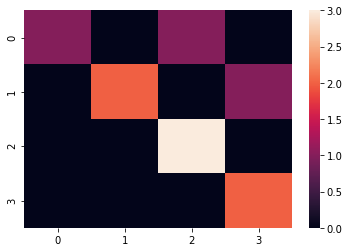

In [48]:
sns.heatmap(confusion_matrix(predicoes, y_test));

In [49]:
print(classification_report(predicoes,y_test))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       1.00      0.67      0.80         3
           2       0.75      1.00      0.86         3
           3       0.67      1.00      0.80         2

    accuracy                           0.80        10
   macro avg       0.85      0.79      0.78        10
weighted avg       0.86      0.80      0.79        10



### Resultados melhoraram, mas ainda não estão ideais

# 3º Teste: obter os valores de média, minimo e máximo e a média da parte real e imaginária da FFT 

In [85]:
def transform_array(arr):
    mean = arr.mean()
    minimun = arr.min()
    maximun = arr.max()
    
    fft_value = np.fft.fft(arr)
    real_part = np.abs(fft_value).mean()
    imaginary_part = np.imag(fft_value).mean()
    
    return np.array([mean, minimun, maximun, real_part, imaginary_part])

In [86]:
transform_array(X.iloc[0])

array([ 5.56007812e+02, -3.76700000e+03,  3.99400000e+03,  1.25314074e+04,
       -2.27373675e-13])

In [87]:
X_transform = X.apply(transform_array, axis=1, result_type='expand')
X_transform.columns = ['Média', 'Minímo', 'Máximo', 'FFT Real', 'FFT Imaginário']
X_transform

,Média,Minímo,Máximo,FFT Real,FFT Imaginário
0,556.007812,-3767.0,3994.0,12531.407364,-2.273737e-13
1,296.060547,-3701.0,4180.0,12886.051282,0.000000e+00
2,268.788574,-4023.0,4593.0,13147.657471,2.273737e-13
3,650.110840,-4091.0,4305.0,11789.206070,0.000000e+00
4,313.874023,-3681.0,4748.0,13832.573825,0.000000e+00
5,617.674805,-3547.0,4654.0,11888.214177,2.273737e-13
6,663.076172,-4187.0,4417.0,11338.054843,1.136868e-13
7,274.715332,-4000.0,4665.0,13280.871504,2.273737e-13
8,306.737793,-4132.0,4913.0,13684.869201,-4.547474e-13
9,305.159180,-3476.0,3145.0,11332.257144,-2.273737e-13


In [88]:
X_output = X_transform.copy()
X_output['class'] = y

X_output.to_csv('Saídas/X_transform.csv')

In [89]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_transform, y, test_size=0.2, random_state=42)

In [90]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True, gamma="auto"),
    NuSVC(probability=True, gamma="auto"),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    AdaBoostClassifier(),
    GradientBoostingClassifier()
]

for classifier in classifiers:
    classifier.fit(X_train, y_train)   
    print(classifier)
    print("model score: %.3f" % classifier.score(X_test, y_test))
    print("\n")

KNeighborsClassifier(n_neighbors=3)
model score: 0.400


SVC(C=0.025, gamma='auto', probability=True)
model score: 0.100


NuSVC(gamma='auto', probability=True)
model score: 0.100


DecisionTreeClassifier()
model score: 0.800


RandomForestClassifier()
model score: 0.600


AdaBoostClassifier()
model score: 0.600


GradientBoostingClassifier()
model score: 0.700




In [91]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(12, input_dim=5, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

X_train_deep = np.asarray(X_train)
y_train_deep = np.asarray(y_train)
X_test_deep = np.asarray(X_test)
y_test_deep = np.asarray(y_test)

In [92]:
model.fit(X_train_deep, y_train_deep, epochs=1000, batch_size=100)

Epoch 1/1000
1/1 [==============================] - 0s 1ms/step - loss: 2132.4158 - accuracy: 0.2895
Epoch 2/1000
1/1 [==============================] - 0s 1ms/step - loss: 2071.8445 - accuracy: 0.2895
Epoch 3/1000
1/1 [==============================] - 0s 1ms/step - loss: 2011.1891 - accuracy: 0.2895
Epoch 4/1000
1/1 [==============================] - 0s 1ms/step - loss: 1949.2308 - accuracy: 0.2895
Epoch 5/1000
1/1 [==============================] - 0s 4ms/step - loss: 1887.4529 - accuracy: 0.2895
Epoch 6/1000
1/1 [==============================] - 0s 5ms/step - loss: 1825.8774 - accuracy: 0.2895
Epoch 7/1000
1/1 [==============================] - 0s 3ms/step - loss: 1764.5183 - accuracy: 0.2895
Epoch 8/1000
1/1 [==============================] - 0s 5ms/step - loss: 1703.3597 - accuracy: 0.2895
Epoch 9/1000
1/1 [==============================] - 0s 5ms/step - loss: 1641.9474 - accuracy: 0.2895
Epoch 10/1000
1/1 [==============================] - 0s 2ms/step - loss: 1580.6428 - accura

1/1 [==============================] - 0s 3ms/step - loss: -494.6507 - accuracy: 0.2632
Epoch 82/1000
1/1 [==============================] - 0s 3ms/step - loss: -503.7891 - accuracy: 0.2632
Epoch 83/1000
1/1 [==============================] - 0s 2ms/step - loss: -513.0807 - accuracy: 0.2632
Epoch 84/1000
1/1 [==============================] - 0s 4ms/step - loss: -522.4969 - accuracy: 0.2632
Epoch 85/1000
1/1 [==============================] - 0s 2ms/step - loss: -531.9874 - accuracy: 0.2632
Epoch 86/1000
1/1 [==============================] - 0s 3ms/step - loss: -541.6796 - accuracy: 0.2632
Epoch 87/1000
1/1 [==============================] - 0s 14ms/step - loss: -551.3934 - accuracy: 0.2632
Epoch 88/1000
1/1 [==============================] - 0s 1ms/step - loss: -560.8477 - accuracy: 0.2632
Epoch 89/1000
1/1 [==============================] - 0s 1ms/step - loss: -570.0587 - accuracy: 0.2632
Epoch 90/1000
1/1 [==============================] - 0s 2ms/step - loss: -576.7541 - accuracy: 

1/1 [==============================] - 0s 2ms/step - loss: -1298.6826 - accuracy: 0.2632
Epoch 161/1000
1/1 [==============================] - 0s 2ms/step - loss: -1312.5896 - accuracy: 0.2632
Epoch 162/1000
1/1 [==============================] - 0s 12ms/step - loss: -1326.5967 - accuracy: 0.2632
Epoch 163/1000
1/1 [==============================] - 0s 5ms/step - loss: -1340.7385 - accuracy: 0.2632
Epoch 164/1000
1/1 [==============================] - 0s 2ms/step - loss: -1355.0343 - accuracy: 0.2632
Epoch 165/1000
1/1 [==============================] - 0s 2ms/step - loss: -1369.4307 - accuracy: 0.2632
Epoch 166/1000
1/1 [==============================] - 0s 4ms/step - loss: -1383.9615 - accuracy: 0.2632
Epoch 167/1000
1/1 [==============================] - 0s 4ms/step - loss: -1398.6182 - accuracy: 0.2632
Epoch 168/1000
1/1 [==============================] - 0s 4ms/step - loss: -1413.4105 - accuracy: 0.2632
Epoch 169/1000
1/1 [==============================] - 0s 4ms/step - loss: -142

1/1 [==============================] - 0s 4ms/step - loss: -2852.6211 - accuracy: 0.2632
Epoch 239/1000
1/1 [==============================] - 0s 6ms/step - loss: -2880.1877 - accuracy: 0.2632
Epoch 240/1000
1/1 [==============================] - 0s 1ms/step - loss: -2907.9927 - accuracy: 0.2632
Epoch 241/1000
1/1 [==============================] - 0s 3ms/step - loss: -2936.0378 - accuracy: 0.2632
Epoch 242/1000
1/1 [==============================] - 0s 1ms/step - loss: -2964.3247 - accuracy: 0.2632
Epoch 243/1000
1/1 [==============================] - 0s 2ms/step - loss: -2992.8564 - accuracy: 0.2632
Epoch 244/1000
1/1 [==============================] - 0s 2ms/step - loss: -3021.6318 - accuracy: 0.2632
Epoch 245/1000
1/1 [==============================] - 0s 2ms/step - loss: -3050.6558 - accuracy: 0.2632
Epoch 246/1000
1/1 [==============================] - 0s 1ms/step - loss: -3079.9285 - accuracy: 0.2632
Epoch 247/1000
1/1 [==============================] - 0s 1ms/step - loss: -3109

1/1 [==============================] - 0s 1ms/step - loss: -5898.4985 - accuracy: 0.2632
Epoch 317/1000
1/1 [==============================] - 0s 5ms/step - loss: -5952.0518 - accuracy: 0.2632
Epoch 318/1000
1/1 [==============================] - 0s 2ms/step - loss: -6006.0420 - accuracy: 0.2632
Epoch 319/1000
1/1 [==============================] - 0s 4ms/step - loss: -6060.4761 - accuracy: 0.2632
Epoch 320/1000
1/1 [==============================] - 0s 7ms/step - loss: -6115.3550 - accuracy: 0.2632
Epoch 321/1000
1/1 [==============================] - 0s 6ms/step - loss: -6170.6816 - accuracy: 0.2632
Epoch 322/1000
1/1 [==============================] - 0s 4ms/step - loss: -6226.4590 - accuracy: 0.2632
Epoch 323/1000
1/1 [==============================] - 0s 5ms/step - loss: -6282.6890 - accuracy: 0.2632
Epoch 324/1000
1/1 [==============================] - 0s 5ms/step - loss: -6339.3711 - accuracy: 0.2632
Epoch 325/1000
1/1 [==============================] - 0s 5ms/step - loss: -6396

1/1 [==============================] - 0s 2ms/step - loss: -11596.5840 - accuracy: 0.2632
Epoch 395/1000
1/1 [==============================] - 0s 2ms/step - loss: -11692.3076 - accuracy: 0.2632
Epoch 396/1000
1/1 [==============================] - 0s 2ms/step - loss: -11788.6748 - accuracy: 0.2632
Epoch 397/1000
1/1 [==============================] - 0s 2ms/step - loss: -11885.6846 - accuracy: 0.2632
Epoch 398/1000
1/1 [==============================] - 0s 2ms/step - loss: -11983.3428 - accuracy: 0.2632
Epoch 399/1000
1/1 [==============================] - 0s 2ms/step - loss: -12081.6494 - accuracy: 0.2632
Epoch 400/1000
1/1 [==============================] - 0s 2ms/step - loss: -12180.6104 - accuracy: 0.2632
Epoch 401/1000
1/1 [==============================] - 0s 3ms/step - loss: -12280.2256 - accuracy: 0.2632
Epoch 402/1000
1/1 [==============================] - 0s 2ms/step - loss: -12380.4941 - accuracy: 0.2632
Epoch 403/1000
1/1 [==============================] - 0s 2ms/step - lo

1/1 [==============================] - 0s 2ms/step - loss: -21181.3789 - accuracy: 0.2632
Epoch 473/1000
1/1 [==============================] - 0s 2ms/step - loss: -21334.7129 - accuracy: 0.2632
Epoch 474/1000
1/1 [==============================] - 0s 3ms/step - loss: -21488.8945 - accuracy: 0.2632
Epoch 475/1000
1/1 [==============================] - 0s 2ms/step - loss: -21643.9141 - accuracy: 0.2632
Epoch 476/1000
1/1 [==============================] - 0s 3ms/step - loss: -21799.7793 - accuracy: 0.2632
Epoch 477/1000
1/1 [==============================] - 0s 2ms/step - loss: -21956.4941 - accuracy: 0.2632
Epoch 478/1000
1/1 [==============================] - 0s 9ms/step - loss: -22114.0547 - accuracy: 0.2632
Epoch 479/1000
1/1 [==============================] - 0s 5ms/step - loss: -22272.4707 - accuracy: 0.2632
Epoch 480/1000
1/1 [==============================] - 0s 6ms/step - loss: -22431.7422 - accuracy: 0.2632
Epoch 481/1000
1/1 [==============================] - 0s 5ms/step - lo

1/1 [==============================] - 0s 2ms/step - loss: -35639.3398 - accuracy: 0.2632
Epoch 550/1000
1/1 [==============================] - ETA: 0s - loss: -35865.0820 - accuracy: 0.263 - 0s 27ms/step - loss: -35865.0820 - accuracy: 0.2632
Epoch 551/1000
1/1 [==============================] - 0s 2ms/step - loss: -36091.8672 - accuracy: 0.2632
Epoch 552/1000
1/1 [==============================] - 0s 10ms/step - loss: -36319.6992 - accuracy: 0.2632
Epoch 553/1000
1/1 [==============================] - 0s 2ms/step - loss: -36548.5742 - accuracy: 0.2632
Epoch 554/1000
1/1 [==============================] - 0s 5ms/step - loss: -36778.4922 - accuracy: 0.2632
Epoch 555/1000
1/1 [==============================] - 0s 1ms/step - loss: -37009.4727 - accuracy: 0.2632
Epoch 556/1000
1/1 [==============================] - 0s 3ms/step - loss: -37241.5000 - accuracy: 0.2632
Epoch 557/1000
1/1 [==============================] - 0s 1ms/step - loss: -37474.5938 - accuracy: 0.2632
Epoch 558/1000
1/1 [

1/1 [==============================] - 0s 2ms/step - loss: -55922.7422 - accuracy: 0.2632
Epoch 626/1000
1/1 [==============================] - 0s 15ms/step - loss: -56233.8555 - accuracy: 0.2632
Epoch 627/1000
1/1 [==============================] - 0s 1ms/step - loss: -56546.1719 - accuracy: 0.2632
Epoch 628/1000
1/1 [==============================] - 0s 1ms/step - loss: -56859.6836 - accuracy: 0.2632
Epoch 629/1000
1/1 [==============================] - 0s 2ms/step - loss: -57174.3945 - accuracy: 0.2632
Epoch 630/1000
1/1 [==============================] - 0s 6ms/step - loss: -57490.3008 - accuracy: 0.2632
Epoch 631/1000
1/1 [==============================] - 0s 1ms/step - loss: -57807.4219 - accuracy: 0.2632
Epoch 632/1000
1/1 [==============================] - 0s 1ms/step - loss: -58125.7383 - accuracy: 0.2632
Epoch 633/1000
1/1 [==============================] - 0s 2ms/step - loss: -58445.2617 - accuracy: 0.2632
Epoch 634/1000
1/1 [==============================] - 0s 4ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: -83893.0078 - accuracy: 0.2632
Epoch 704/1000
1/1 [==============================] - 0s 2ms/step - loss: -84301.6719 - accuracy: 0.2632
Epoch 705/1000
1/1 [==============================] - 0s 2ms/step - loss: -84711.6406 - accuracy: 0.2632
Epoch 706/1000
1/1 [==============================] - 0s 4ms/step - loss: -85122.8828 - accuracy: 0.2632
Epoch 707/1000
1/1 [==============================] - 0s 2ms/step - loss: -85535.4531 - accuracy: 0.2632
Epoch 708/1000
1/1 [==============================] - 0s 4ms/step - loss: -85949.3203 - accuracy: 0.2632
Epoch 709/1000
1/1 [==============================] - 0s 2ms/step - loss: -86364.5078 - accuracy: 0.2632
Epoch 710/1000
1/1 [==============================] - 0s 6ms/step - loss: -86780.9688 - accuracy: 0.2632
Epoch 711/1000
1/1 [==============================] - 0s 4ms/step - loss: -87198.7578 - accuracy: 0.2632
Epoch 712/1000
1/1 [==============================] - 0s 5ms/step - lo

1/1 [==============================] - 0s 2ms/step - loss: -119242.2656 - accuracy: 0.2632
Epoch 781/1000
1/1 [==============================] - 0s 2ms/step - loss: -119754.1172 - accuracy: 0.2632
Epoch 782/1000
1/1 [==============================] - 0s 2ms/step - loss: -120267.3984 - accuracy: 0.2632
Epoch 783/1000
1/1 [==============================] - 0s 4ms/step - loss: -120782.0000 - accuracy: 0.2632
Epoch 784/1000
1/1 [==============================] - 0s 2ms/step - loss: -121298.0156 - accuracy: 0.2632
Epoch 785/1000
1/1 [==============================] - 0s 2ms/step - loss: -121815.3672 - accuracy: 0.2632
Epoch 786/1000
1/1 [==============================] - 0s 2ms/step - loss: -122334.1328 - accuracy: 0.2632
Epoch 787/1000
1/1 [==============================] - 0s 2ms/step - loss: -122854.3047 - accuracy: 0.2632
Epoch 788/1000
1/1 [==============================] - 0s 3ms/step - loss: -123375.8281 - accuracy: 0.2632
Epoch 789/1000
1/1 [==============================] - 0s 2ms/

1/1 [==============================] - 0s 2ms/step - loss: -162141.7969 - accuracy: 0.2632
Epoch 857/1000
1/1 [==============================] - ETA: 0s - loss: -162761.1719 - accuracy: 0.26 - 0s 3ms/step - loss: -162761.1719 - accuracy: 0.2632
Epoch 858/1000
1/1 [==============================] - 0s 2ms/step - loss: -163381.9688 - accuracy: 0.2632
Epoch 859/1000
1/1 [==============================] - 0s 2ms/step - loss: -164004.2656 - accuracy: 0.2632
Epoch 860/1000
1/1 [==============================] - 0s 2ms/step - loss: -164628.0000 - accuracy: 0.2632
Epoch 861/1000
1/1 [==============================] - 0s 2ms/step - loss: -165253.2031 - accuracy: 0.2632
Epoch 862/1000
1/1 [==============================] - 0s 2ms/step - loss: -165879.8281 - accuracy: 0.2632
Epoch 863/1000
1/1 [==============================] - 0s 2ms/step - loss: -166507.9062 - accuracy: 0.2632
Epoch 864/1000
1/1 [==============================] - 0s 2ms/step - loss: -167137.4688 - accuracy: 0.2632
Epoch 865/100

1/1 [==============================] - 0s 3ms/step - loss: -213407.6562 - accuracy: 0.2632
Epoch 933/1000
1/1 [==============================] - 0s 2ms/step - loss: -214139.6875 - accuracy: 0.2632
Epoch 934/1000
1/1 [==============================] - 0s 9ms/step - loss: -214873.2656 - accuracy: 0.2632
Epoch 935/1000
1/1 [==============================] - 0s 5ms/step - loss: -215608.2969 - accuracy: 0.2632
Epoch 936/1000
1/1 [==============================] - 0s 2ms/step - loss: -216344.9062 - accuracy: 0.2632
Epoch 937/1000
1/1 [==============================] - 0s 17ms/step - loss: -217083.0000 - accuracy: 0.2632
Epoch 938/1000
1/1 [==============================] - 0s 6ms/step - loss: -217822.6250 - accuracy: 0.2632
Epoch 939/1000
1/1 [==============================] - 0s 5ms/step - loss: -218563.7500 - accuracy: 0.2632
Epoch 940/1000
1/1 [==============================] - 0s 4ms/step - loss: -219306.3906 - accuracy: 0.2632
Epoch 941/1000
1/1 [==============================] - 0s 5ms

In [93]:
_, accuracy = model.evaluate(X_test_deep, y_test_deep)
print('Accuracy: %.2f' % (accuracy*100))

1/1 [==============================] - 0s 1ms/step - loss: -1067540.2500 - accuracy: 0.2000
Accuracy: 20.00


### Notas
* Melhoria significativa em disversos algoritmos
* Redes Neurais ainda se mostram muito ineficientes

In [94]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)  
predicoes = clf.predict(X_test)

In [95]:
accuracy_score(predicoes, y_test)

0.8

In [96]:
confusion_matrix(predicoes, y_test)

array([[1, 0, 2, 0],
       [0, 2, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 3]])

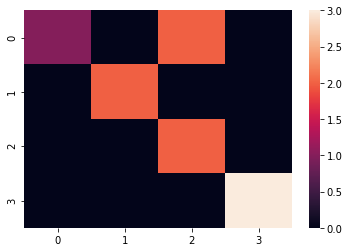

In [97]:
sns.heatmap(confusion_matrix(predicoes, y_test));

In [98]:
print(classification_report(predicoes,y_test))

              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       1.00      1.00      1.00         2
           2       0.50      1.00      0.67         2
           3       1.00      1.00      1.00         3

    accuracy                           0.80        10
   macro avg       0.88      0.83      0.79        10
weighted avg       0.90      0.80      0.78        10



In [99]:
lbl_enc.inverse_transform([0,1,2,3])

array(['0 - Regime Normal/', '1 - Falta de tensão/', '2 - Sobrecarga/',
       '3 - Desbalanceamento do eixo/'], dtype=object)

## Notas
* O algoritmo está com dificuldades para diferenciar entre o 'Regime Normal' e a 'Sobrecarga' porém identifica perfeitamente a 'Falta de Tensão' e o 'Desbalanceamento de eixo'

# 4º Teste: Aplicando pré-processamento de dados com as técnicas do 3º teste

In [65]:
from sklearn.preprocessing import StandardScaler

X_scale = StandardScaler().fit_transform(X_transform)

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.2, random_state=42)

In [67]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True, gamma="auto"),
    NuSVC(probability=True, gamma="auto"),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    AdaBoostClassifier(),
    GradientBoostingClassifier()
]

for classifier in classifiers:
    classifier.fit(X_train, y_train)   
    print(classifier)
    print("model score: %.3f" % classifier.score(X_test, y_test))
    print("\n")

KNeighborsClassifier(n_neighbors=3)
model score: 0.500


SVC(C=0.025, gamma='auto', probability=True)
model score: 0.100


NuSVC(gamma='auto', probability=True)
model score: 0.400


DecisionTreeClassifier()
model score: 0.800


RandomForestClassifier()
model score: 0.600


AdaBoostClassifier()
model score: 0.600


GradientBoostingClassifier()
model score: 0.800




In [68]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)  
predicoes = clf.predict(X_test)

In [69]:
confusion_matrix(predicoes, y_test)

array([[1, 0, 2, 0],
       [0, 2, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 3]])

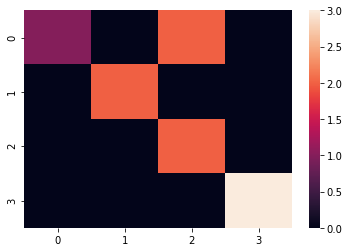

In [70]:
sns.heatmap(confusion_matrix(predicoes, y_test));

In [71]:
print(classification_report(predicoes,y_test))

              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       1.00      1.00      1.00         2
           2       0.50      1.00      0.67         2
           3       1.00      1.00      1.00         3

    accuracy                           0.80        10
   macro avg       0.88      0.83      0.79        10
weighted avg       0.90      0.80      0.78        10



# Notas:
* O algoritmo continua performando mal para diferenciar as classe "0" e "2"
* Será que um ganho no sinal ajudaria?

# 5º Teste: Aplicando um ganho com as técnicas do 3º teste

In [72]:
ganho = 0.5

def ganho_audio(row):
    return ganho * row

In [73]:
X_ganho = X.apply(ganho_audio, axis=1, result_type='expand')
X_transform = X_ganho.apply(transform_array, axis=1, result_type='expand')
X_transform.columns = ['Média', 'Minímo', 'Máximo', 'FFT Real', 'FFT Imaginário']
X_transform

,Média,Minímo,Máximo,FFT Real,FFT Imaginário
0,278.003906,-1883.5,1997.0,6265.703682,-1.136868e-13
1,148.030273,-1850.5,2090.0,6443.025641,0.000000e+00
2,134.394287,-2011.5,2296.5,6573.828735,1.136868e-13
3,325.055420,-2045.5,2152.5,5894.603035,0.000000e+00
4,156.937012,-1840.5,2374.0,6916.286913,0.000000e+00
5,308.837402,-1773.5,2327.0,5944.107088,1.136868e-13
6,331.538086,-2093.5,2208.5,5669.027422,5.684342e-14
7,137.357666,-2000.0,2332.5,6640.435752,1.136868e-13
8,153.368896,-2066.0,2456.5,6842.434601,-2.273737e-13
9,152.579590,-1738.0,1572.5,5666.128572,-1.136868e-13


In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_transform, y, test_size=0.2, random_state=42)

In [75]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True, gamma="auto"),
    NuSVC(probability=True, gamma="auto"),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    AdaBoostClassifier(),
    GradientBoostingClassifier()
]

for classifier in classifiers:
    classifier.fit(X_train, y_train)   
    print(classifier)
    print("model score: %.3f" % classifier.score(X_test, y_test))
    print("\n")

KNeighborsClassifier(n_neighbors=3)
model score: 0.400


SVC(C=0.025, gamma='auto', probability=True)
model score: 0.100


NuSVC(gamma='auto', probability=True)
model score: 0.100


DecisionTreeClassifier()
model score: 0.800


RandomForestClassifier()
model score: 0.600


AdaBoostClassifier()
model score: 0.600


GradientBoostingClassifier()
model score: 0.700




# Conclusões:

* Melhor tratamento: Obter as métricas principais (transform_array)
* Melhor algoritmo: Árvores de decisão

## Utilização da busca em grade para obter os melhores parâmetros da árvore de decisão

In [76]:
from sklearn.model_selection import train_test_split

X_transform = X.apply(transform_array, axis=1, result_type='expand')
X_transform.columns = ['Média', 'Minímo', 'Máximo', 'FFT Real', 'FFT Imaginário']
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.2, random_state=42)

In [101]:
from sklearn.model_selection import GridSearchCV

min_samples_leaf = [1, 2, 3, 4, 5, 25, 50, 100, 200]
criterion = ['gini', 'entropy']
max_depth = [2, 3, 4, 6, 8, 10, 12]
    
parameters = {                
                'criterion':criterion, 
                'max_depth':max_depth, 
             }

dec_tree = DecisionTreeClassifier()
clf = GridSearchCV(dec_tree, parameters, verbose=3)

In [104]:
grid_search = clf.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV 1/5] END .......criterion=gini, max_depth=2;, score=0.625 total time=   0.0s
[CV 2/5] END .......criterion=gini, max_depth=2;, score=0.750 total time=   0.0s
[CV 3/5] END .......criterion=gini, max_depth=2;, score=0.625 total time=   0.0s
[CV 4/5] END .......criterion=gini, max_depth=2;, score=0.857 total time=   0.0s
[CV 5/5] END .......criterion=gini, max_depth=2;, score=0.857 total time=   0.0s
[CV 1/5] END .......criterion=gini, max_depth=3;, score=0.625 total time=   0.0s
[CV 2/5] END .......criterion=gini, max_depth=3;, score=0.625 total time=   0.0s
[CV 3/5] END .......criterion=gini, max_depth=3;, score=0.500 total time=   0.0s
[CV 4/5] END .......criterion=gini, max_depth=3;, score=0.857 total time=   0.0s
[CV 5/5] END .......criterion=gini, max_depth=3;, score=0.714 total time=   0.0s
[CV 1/5] END .......criterion=gini, max_depth=4;, score=0.750 total time=   0.0s
[CV 2/5] END .......criterion=gini, max_depth=4;

In [105]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 8}

In [106]:
best_clf = grid_search.best_estimator_

In [107]:
predicoes = best_clf.predict(X_test)
print(classification_report(predicoes,y_test))

              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       1.00      1.00      1.00         2
           2       0.50      1.00      0.67         2
           3       1.00      1.00      1.00         3

    accuracy                           0.80        10
   macro avg       0.88      0.83      0.79        10
weighted avg       0.90      0.80      0.78        10



# Resumo de exportação (modelo criado + funções de tratamento de dados)

#### Funções utilizadas

In [108]:
import numpy as np

def transform_array(arr):
    """ Esta função retorna os valores médios, minimos, 
    máximos e a média das componentes real e imaginária da FFT"""
    
    mean = arr.mean()
    minimun = arr.min()
    maximun = arr.max()
    
    fft_value = np.fft.fft(arr)
    real_part = np.abs(fft_value).mean()
    imaginary_part = np.imag(fft_value).mean()
    
    return np.array([mean, minimun, maximun, real_part, imaginary_part])

#### Exportação do modelo criado

In [110]:
import pickle as pkl


with open('Preditores/classificador_som_ambiente.pkl', 'wb') as best_file:
    pkl.dump(best_clf, best_file)